# 04. Tree and Ensemble Methods

[Scimago](https://www.scimagojr.com/) - site to check if a science journal is legit\
When reviewing the scientific papers we have to look at atleast some of the refrences

GridSearchCV is useful but it is too slow and outdated in the way it works. Not optimal.\
Hyper opt is much better.

For computer vision we use IoU (Intersection over Union) for error measurement of areas:\
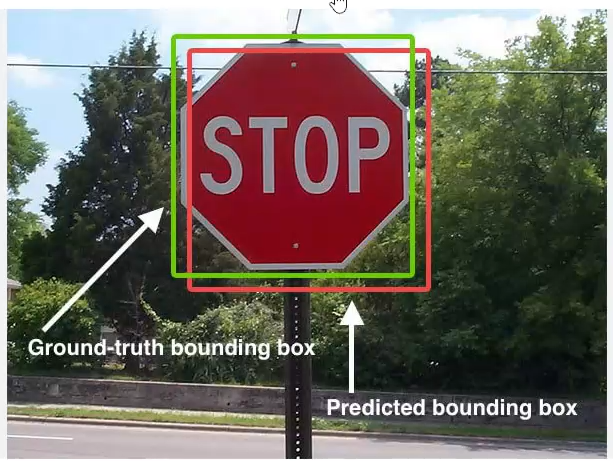

```If the data point's number/id has meaning to the prediction of the target variable that means we have a hidden variable that is proobably time```

## Feature Selection vs Dimentionality Reduction

- Feature Selection: ```Apriori (Before we have a model) we know that some variables we don't need/have any value so we don't have to collect/gather them in the future.``` Is done before starting to model the data.
- Dimentionality Reduction: ```Aposteriori (after we have a model) we reduce the variability the model sees. We still gather all the variables. Boosts performance on datasets with a lot of columns```

Increasing te number of features could be an artificial process but it shouldn't be.

Polynomial features introduces relationships between the features. It is not artificial.

If we have a datapoint that is duplicated that means we give it twice the weight in the model compared to other unique data points.

Don't have duplicates!\
Example for artificial feature: We use extrapolation without having to do it.


The variables should be independent.

How to make structured data from unstructured data: We get statistics from the unstr. data

Example: Audio

Instead of using the audio we do Fourie analysis and use the fourie coef.

We have to make the model overfit a little to know where the limit is. To know that it is doing its best. Then we know it doesn't have high bias.

Overfitting means:
- The model's capacity is too big (It can learn the data too well)
- The amount of data is too small

Then we can lower the overfitting by:
- Lowering the amount of columns
- Increase the amount of data

It is good to have an overparameterized model (too many features, always overfits) and then tune it.\
Neaural networks always overfit.

## Decision Trees

Trees' big advantage - easy to interpret, part of more complex predictors

The standart alogs can be divided in 2 categories:
- Linear
- Ensambles (many predictors together)
- SVMs - Increase the dimentionality internally to describe it better. (In theory are the perfect estimators for everything, but are really slow)

NN are perfect for everything but dont really work well with small amounts of data.

#### Can be used for classification for regression

Dendogram - graph of a tree

On each step we decide how to slit the data. we want to choose the best feature that gives us the best Information Gain(IG)
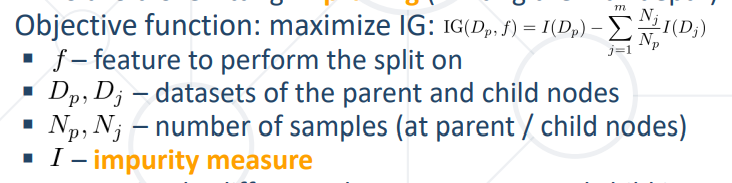

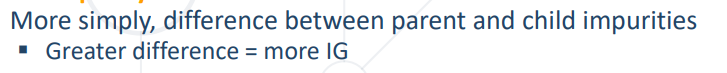

When we split a set of data with entropy (IG) we get N new data sets that comulatively are a lot more ordered than the initial one.

```We get the most IG when we get the lowest entropy.```

IG is Entropy(Parent) - SUM(Entropy(Children) * Weighted), where Weigthed is just the dataset's count ratio (Parent to child set.Count())

Gini index is kind of like Entropy but a bit different

Think of it like:

```From the chaos we have in the current note we want to get the most ordeered children sets```

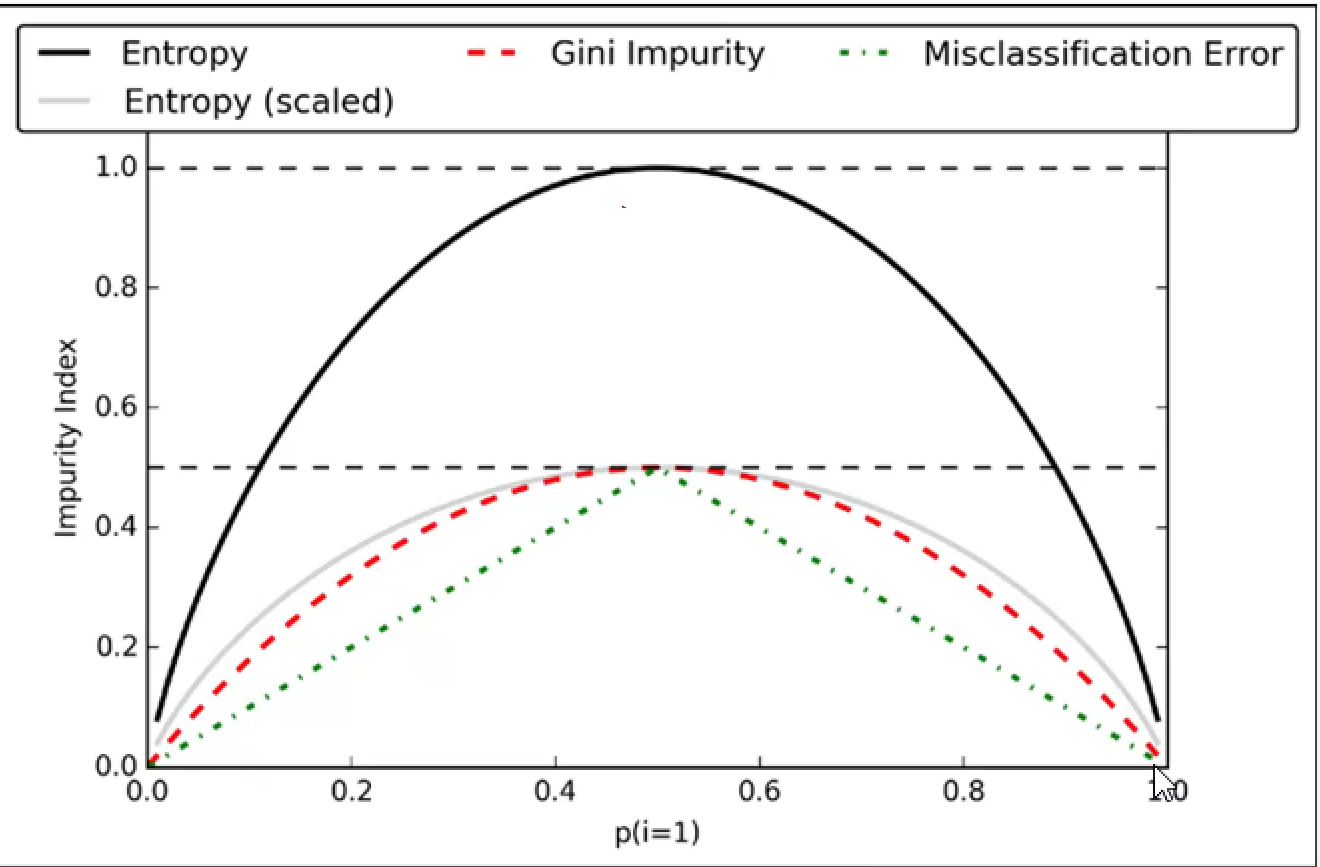

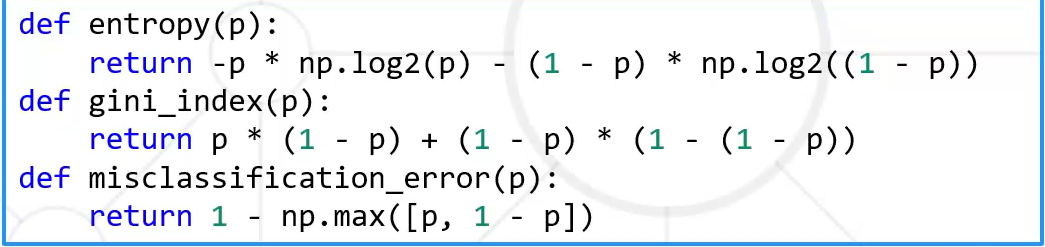

When optimizing the Decision tree we want to tune either:
- max_depth
- min_sample_leaf and min_samplE_split

One or the other, NOT BOTH\
2nd approach is maybe better

Trees work perfectly with categrical variables. With numbers not so much - it uses constrants like <= 5 which make ortogonal constrains to the X and Y Axis in a 2D plane for example.

Trees dont work well with ranked variables. One datapoint being better than another.

Trees cant make extrapolation. Therefore very bad for time series.

Trees are traind with IG not Gradient Descent
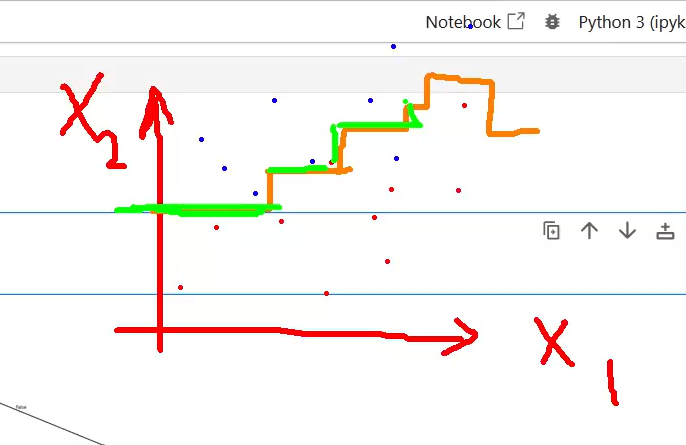

## Random Forests

Each decision tree in the forest must have similar hyperparameters. Otherwise it is a voting classifier (an array of dec. trees)

Each Decision Tree(DT) is trained on partial/different part of the data(rows) and a partial different set of the features(columns)

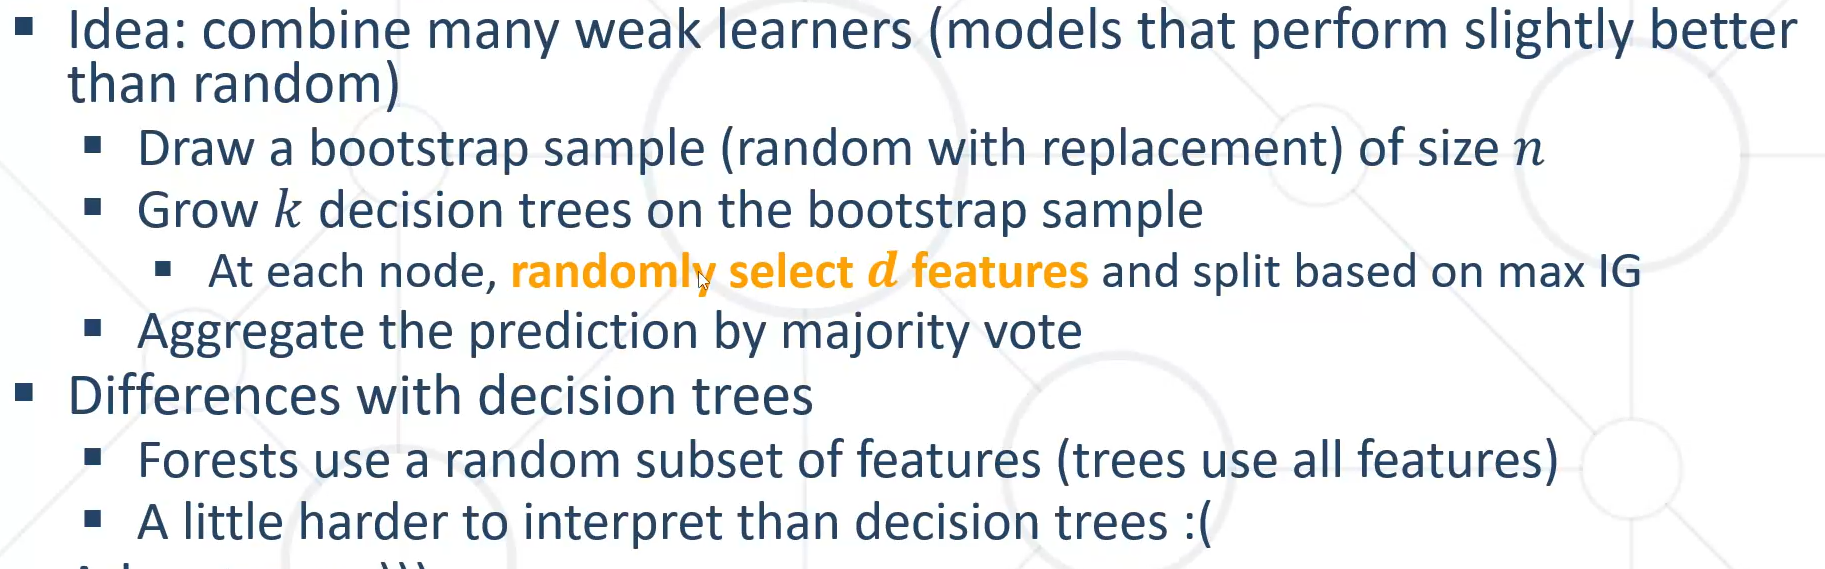

Bootstrap with replacement - a single data point could end up in multiple different DT

Random forests overfit a lot less than DTs

We can get feature importances of a Random Forest with
``` forest.feature_importances_ ```

A feature is more important if it has been selected more times for a split (IG on that variable) 


#### This way of getting feature importances is not great:
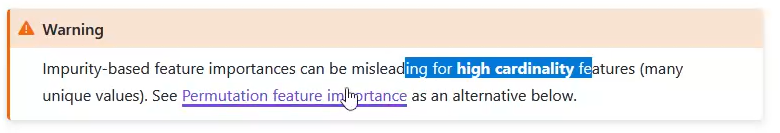
Because when we have a lot of features (high cardinality) it can not work so well.

We can see it in the scikit learn documentation.\
A better way is Permutation feature importance

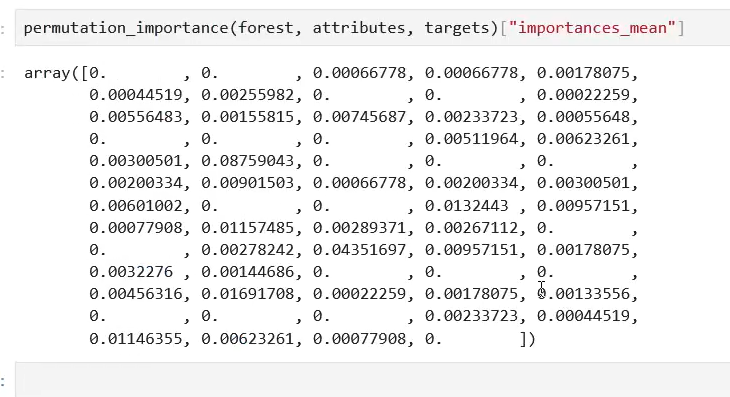

### Permutation feature importance
An ablation study investigates the performance of an AI system by removing certain components to understand the contribution of the component to the overall system.

If we remove a feature and train test again and the model is much worse than before that means the feature is important. Permutation features does something similar. It picks out a particular feature and it permutates the rows in it. And train tests to see if there is a difference. If the new performance is the same or close to the old that means it is not very important.

```This is a universal method for determining feature imporances.```
We should use this method in most cases.

## How does an Ensamle work?
Ensambles are a way to combine weak learners (very important that they are weak)
What does weak mean? Such that have high bias. Dummies :). Each weak learning kind of specializes on different parts of the data.

For example: Random forest "cuts out" part of the dataset and features. This way no tree can overfit(perfectly learn) the data. Hence they become weak learners.

*NN are also ensambles

#### There are 3 types of ensambles:
- [Bagging](https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning)
    - ```Bagging, an abbreviation for Bootstrap Aggregating, is a machine learning ensemble strategy for enhancing the reliability and precision of predictive models. It entails generating numerous subsets of the training data by employing random sampling with replacement. These subsets train multiple base learners, such as decision trees, neural networks, or other models.```
    - Majority voting for classification
    - Mean average for regression
    - BaggingClassifier/Regressor works with any estimator, not only DT
- [Stacking](https://www.simplilearn.com/ensemble-learning-article)
    - 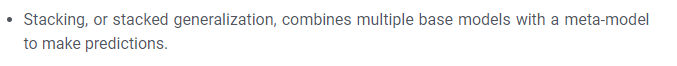
    - Stack different estimators one after another, the result of the first one is given to the 2nd
    - Stacking, or stacked generalization, combines multiple base models with a meta-model to make predictions.
    - Instead of using simple methods like averaging or voting, stacking trains a meta-model to learn how to combine the base models' predictions best.
    - The base models can be diverse to capture different aspects of the data, and the meta-model learns to weight its predictions based on its performance.
- [Boosting](https://www.simplilearn.com/ensemble-learning-article) - each estimator is learning on the mistakes of the previous. For the 18th estimator to work, the 17th must have completed
    - Boosting is an ensemble technique where base models are trained sequentially, with each subsequent model focusing on the mistakes of the previous ones.
    - The final prediction is a weighted sum of the individual models' predictions, with higher weights given to more accurate models.
    - Boosting algorithms like AdaBoost, Gradient Boosting, and XGBoost are popular because they improve model performance.
    - #### There are 2 types of Boosting:
        - AdaBoost (Adaptive Boosting)
            - 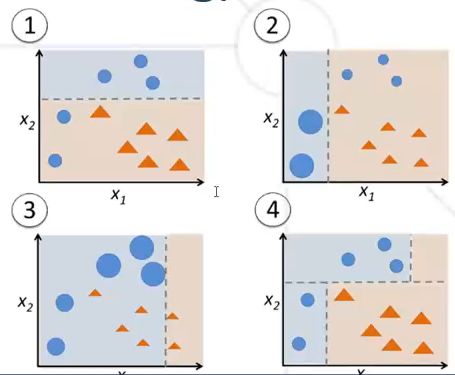
            - The mistakes of the Nth estimator are given a higher weight and therefore are a higher priority to get right for the N+1th estimator
        - GradientBoost (XGBoost - Extreme Gradient Boosting, LightGBM - Light Gradient Boosting Method)
            - Here we dont adapt to the mistakes of the previous est. We directly train on the mistakes of the previous est.
            - 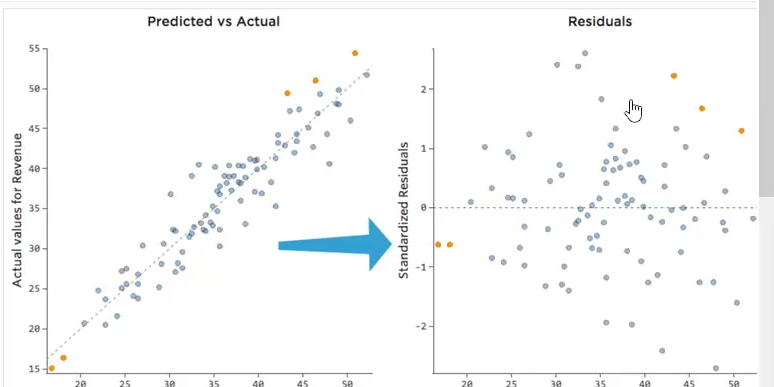
            - We train the next estimator on the residuals of the previous
- And maybe voting


Bagging usually is done with the same Estimator while Voting is done with different ones.

#### Monotonic Constraint (XGBOOST and other ensambles as well)
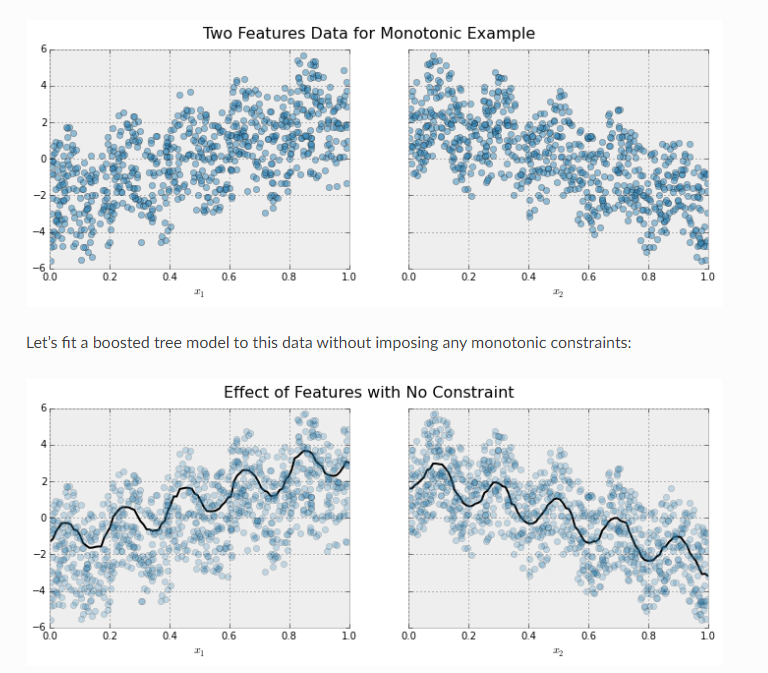

## Warning

XGBoost wins a lot of Kaggle competitions, but in reality doesn't really work. It very easily overfits

If you are going to use XGBoost you better be able to defend why and how you used it